In [1]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
import matplotlib as mpl
from matplotlib import cm
from matplotlib.ticker import LinearLocator

In [2]:
N = 20
rho_coherent = coherent_dm(N, alpha=2)
rho_thermal = thermal_dm(N, 0.7)
rho_fock = fock_dm(N, 1)
rho_vacuum = coherent_dm(N,alpha=0)
#Need coherent vacuum state and squeezed state
vacuum_ket = coherent(N,0)
squeezed_ket = squeeze(N, 0.9) * vacuum_ket
squeezed_bra = squeezed_ket.dag()
rho_squeezed = squeezed_ket*squeezed_bra

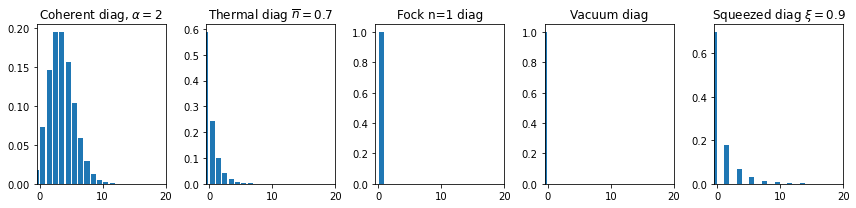

In [3]:
fig, axes = plt.subplots(1, 5, figsize=(12,3))
bar0 = axes[0].bar(np.arange(0, N)-.5, rho_coherent.diag())
lbl0 = axes[0].set_title(r"Coherent diag, $\alpha = 2$")
lim0 = axes[0].set_xlim([-.5, N])
bar1 = axes[1].bar(np.arange(0, N)-.5, rho_thermal.diag())
lbl1 = axes[1].set_title("Thermal diag $\overline{n} = 0.7$")
lim1 = axes[1].set_xlim([-.5, N])
bar2 = axes[2].bar(np.arange(0, N)-.5, rho_fock.diag())
lbl2 = axes[2].set_title("Fock n=1 diag")
lim2 = axes[2].set_xlim([-.5, N])
bar3 = axes[3].bar(np.arange(0, N)-.5, rho_vacuum.diag())
lbl3 = axes[3].set_title("Vacuum diag")
lim3 = axes[3].set_xlim([-.5, N])
bar4 = axes[4].bar(np.arange(0, N)-.5, rho_squeezed.diag())
lbl4 = axes[4].set_title(r"Squeezed diag $\xi = 0.9$")
lim4 = axes[4].set_xlim([-.5, N])
fig.tight_layout()

plt.show()

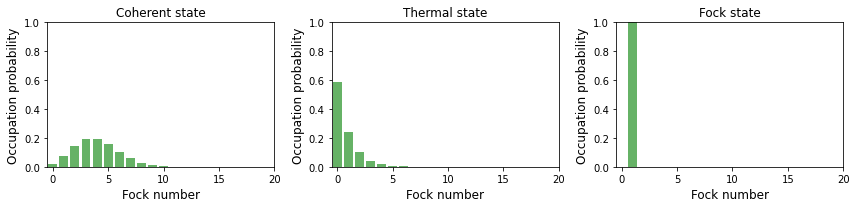

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))
plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0], title="Coherent state");
plot_fock_distribution(rho_thermal, fig=fig, ax=axes[1], title="Thermal state");
plot_fock_distribution(rho_fock, fig=fig, ax=axes[2], title="Fock state");
fig.tight_layout()
plt.show()

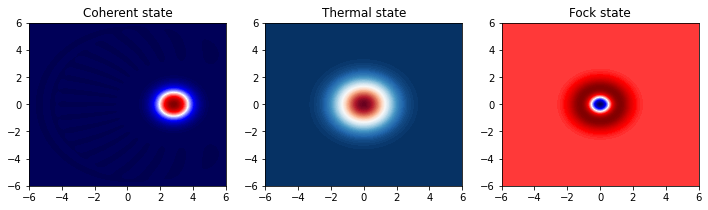

In [5]:
xvec = np.linspace(-6,6,200)
W_coherent = wigner(rho_coherent, xvec, xvec)
W_thermal = wigner(rho_thermal, xvec, xvec)
W_fock = wigner(rho_fock, xvec, xvec)
# plot the results
fig, axes = plt.subplots(1, 3, figsize=(12,3))
cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100,cmap='seismic')
lbl0 = axes[0].set_title("Coherent state")
cont1 = axes[1].contourf(xvec, xvec, W_thermal, 100,cmap = 'RdBu_r')
lbl1 = axes[1].set_title("Thermal state")
cont0 = axes[2].contourf(xvec, xvec, W_fock, 100, cmap='seismic')
lbl2 = axes[2].set_title("Fock state")
plt.show()

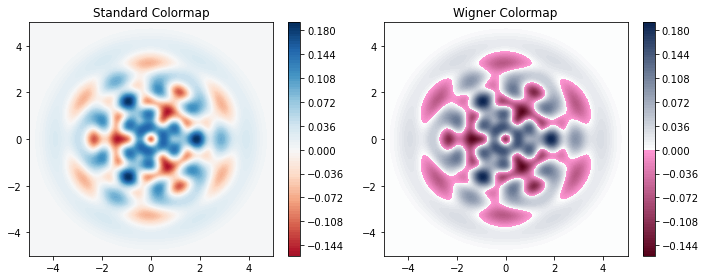

In [6]:
psi = (basis(10, 0) + basis(10, 3) + basis(10, 9)).unit()
xvec = np.linspace(-5, 5, 500)
W = wigner(psi, xvec, xvec)
wmap = wigner_cmap(W)  # Generate Wigner colormap
nrm = mpl.colors.Normalize(-W.max(), W.max())
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
plt1 = axes[0].contourf(xvec, xvec, W, 100, cmap=cm.RdBu, norm=nrm)
axes[0].set_title("Standard Colormap");
cb1 = fig.colorbar(plt1, ax=axes[0])
plt2 = axes[1].contourf(xvec, xvec, W, 100, cmap=wmap)  # Apply Wigner colormap
axes[1].set_title("Wigner Colormap");
cb2 = fig.colorbar(plt2, ax=axes[1])
fig.tight_layout()

plt.show()

In [7]:
#rho_ss = steadystate(H, [np.sqrt(0.1) * a, np.sqrt(0.4) * b.dag()])
#fig, ax = hinton(rho_ss) # xlabels=xlabels, ylabels=xlabels)
#plt.show()

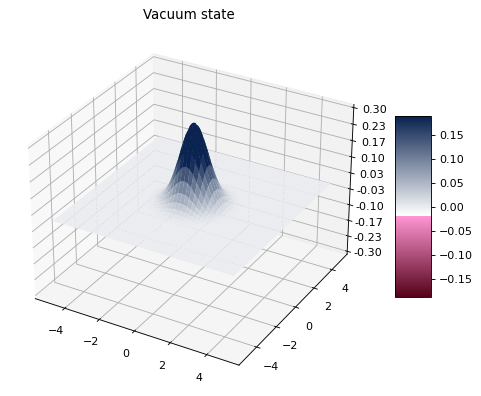

In [8]:
#The vacuum state is a coherent state with alpha = 0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,6], dpi=80)
# Make data.
X = xvec
Y = xvec
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = wigner(rho_vacuum, xvec, xvec)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=wmap,linewidth=0, antialiased=True,norm=nrm)
# Customize the z axis.
ax.set_zlim(-0.3, 0.3)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Vacuum state')
plt.show()

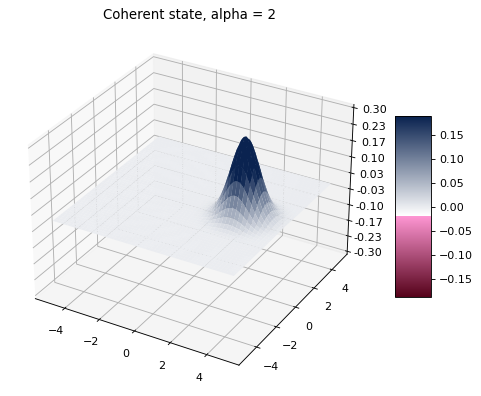

In [9]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,6], dpi=80)
# Make data.
X = xvec
Y = xvec
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = wigner(rho_coherent, xvec, xvec)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=wmap,linewidth=0, antialiased=True,norm=nrm,)
# Customize the z axis.
ax.set_zlim(-0.3, 0.3)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Coherent state, alpha = 2')
plt.show()

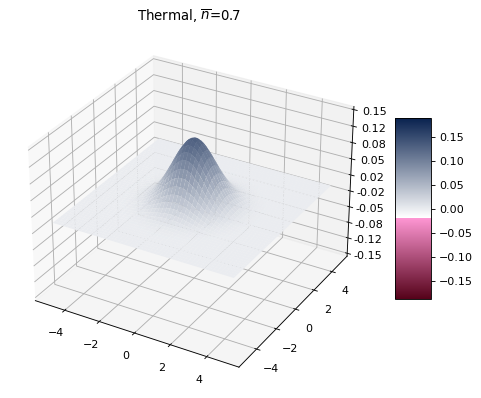

In [10]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,6], dpi=80)
# Make data.
X = xvec
Y = xvec
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = wigner(rho_thermal, xvec, xvec)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=wmap,linewidth=0, antialiased=True,norm=nrm)
# Customize the z axis.
ax.set_zlim(-0.15, 0.15)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'Thermal, $\overline{n}$=0.7')
plt.show()

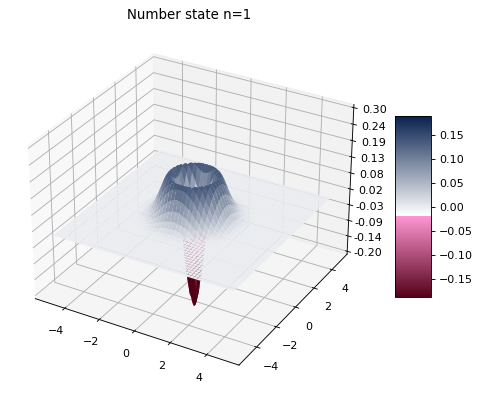

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,6], dpi=80)
# Make data.
X = xvec
Y = xvec
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = wigner(rho_fock, xvec, xvec)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=wmap,linewidth=0, antialiased=True,norm=nrm)
# Customize the z axis.
ax.set_zlim(-0.2, 0.3)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Number state n=1')
plt.show()

In [12]:
vacuum_ket = coherent(N,0)
squeezed_ket = squeeze(N, 0.9) * vacuum_ket
#vacuum_bra = coherent(N,0).dag()
squeezed_bra = squeezed_ket.dag()
#squeezed_bra = squeeze(N,1.0)*vacuum_bra
rho_squeezed = squeezed_ket*squeezed_bra

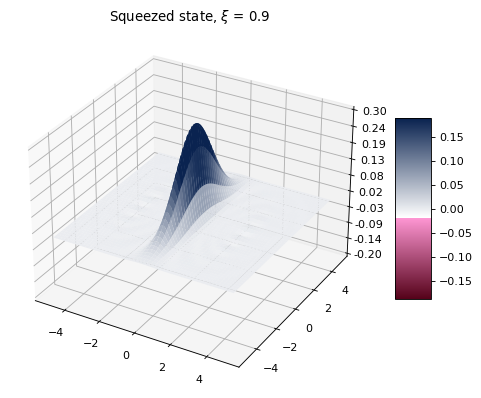

In [13]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=[8,6], dpi=80)
# Make data.
X = xvec
Y = xvec
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = wigner(rho_squeezed, xvec, xvec)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=wmap,linewidth=0, antialiased=True,norm=nrm)
# Customize the z axis.
ax.set_zlim(-0.2, 0.3)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title(r'Squeezed state, $\xi$ = 0.9')
plt.show()